# CPSC 481 - Artificial Intelligence - Project

# Machine Learning in the stock market

by Nils Heimbach

CWID: 885179317

E-Mail: heimbachnils@csu.fullerton.edu

_______________________
#### Table of content: <a class="TOC" id="TOC"></a>

0. [Pre-Settings](#0)
1. [Importing data](#1)
2. [Data Understanding](#2)
3. [Data Preparation](#3)
4. [Data Modeling](#4)
5. [Data Evaluation and Analysis](#5)
6. [Conclusion](#6)

## 0. Pre-Settings <a class="0" id="0"></a>

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import pandas as pd
import numpy as np

In [42]:
# path configuration (change "path_to_dir" to the main directory): 
path_to_dir = R"C:\Users\heimb\Documents\GitHub\CPSC481_AI_Project"

path_to_input = path_to_dir+"\Data\Input"
path_to_output = path_to_dir+"\Data\Output"
path_to_code = path_to_dir+"\Code"

# Choose Stock: 
stock = "AAPL"

# Choose start time for downloaded data:
start = "2020-01-01"

In [43]:
# Expanding the directory with the "Code" directory 
import sys
sys.path.insert(0, path_to_dir+"\Code")

[Click here to go to the top of the chapter](#0)

[Click here for the table of content](#TOC)

## 1. Importing data <a class="1" id="1"></a>

In [44]:
import yfinance as yf

In [45]:
# download stock into dataframe
df = yf.download(stock,start=start)
# save dataframe into .csv
df.to_pickle(path_to_input+"\\"+stock+"_stock_data_since_"+start+".pkl")
# show dataframe
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200
...,...,...,...,...,...,...
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400


[Click here to go to the top of the chapter](#1)

[Click here for the table of content](#TOC)

## 2. Data Understanding <a class="2" id="2"></a>

In [46]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200
...,...,...,...,...,...,...
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400


In [47]:
df.shape

(739, 6)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2020-01-02 to 2022-12-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       739 non-null    float64
 1   High       739 non-null    float64
 2   Low        739 non-null    float64
 3   Close      739 non-null    float64
 4   Adj Close  739 non-null    float64
 5   Volume     739 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.4 KB


In [29]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,739.000000,739.000000,739.000000,739.000000,739.000000,7.390000e+02
mean,130.082477,131.749374,128.485869,130.184005,129.135010,1.127684e+08
std,30.915529,31.165182,30.609265,30.891764,31.139140,5.639279e+07
min,57.020000,57.125000,53.152500,56.092499,55.082977,3.519590e+07
25%,115.520000,116.840000,113.838749,115.340000,113.799572,7.648380e+07
50%,135.830002,137.330002,133.770004,135.389999,134.869995,9.604190e+07
75%,150.685005,152.314995,149.244995,150.980003,150.403786,1.301160e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,4.265100e+08


In [30]:
from own_functions import insights_of_df

insights_of_df(df)

,colName,non-null values,null values,percentNA,unique,dtype
0,Open,739,0,0.0,714,float64
1,High,739,0,0.0,707,float64
2,Low,739,0,0.0,712,float64
3,Close,739,0,0.0,711,float64
4,Adj Close,739,0,0.0,730,float64
5,Volume,739,0,0.0,737,int64


[Click here to go to the top of the chapter](#2)

[Click here for the table of content](#TOC)

## 3. Data Preparation <a class="3" id="3"></a>

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846375,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200
...,...,...,...,...,...,...
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400


In [48]:
# Adding return column as target value

df["Return"] = (df["Close"]-df["Open"])/df["Open"]

df

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400,0.013874
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800,0.000942
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200,0.020457
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000,-0.004836
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200,0.020292
...,...,...,...,...,...,...,...
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400,0.046888
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400,0.000675
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400,0.012675


In [40]:
df.iloc[:,:-1]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846375,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200
...,...,...,...,...,...,...
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400


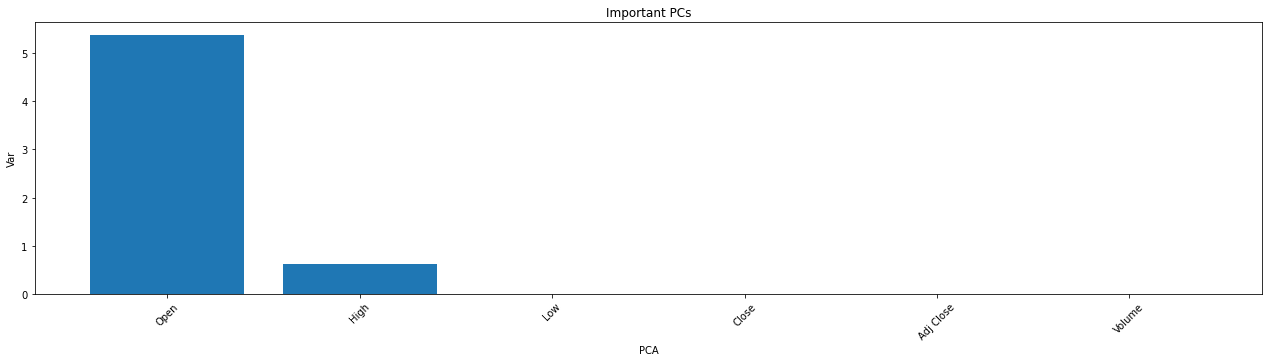

In [41]:
# PCA
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.iloc[:, :-1]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plot a bar chart describing the variance of each feature
features = range(pca.n_components_)
features2 = X.columns

# Define bar chart size
_ = plt.figure(figsize=(22, 5))

# Define actual bar chart
_ = plt.bar(features2, pca.explained_variance_)

# Labels, Titles und Ticks of the bar chart 
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features2, rotation=45)
_ = plt.title("Important PCs")

# Display the bar chart
plt.show()

In [49]:
# splitting df into descriptive (x) and target (y) features

x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

# manually splitting "x" and "y" into train and test data (see "train_test_split" below for distribution)
train_test_split = 0.7

amt_rows = x.shape[0]
split = round(amt_rows*train_test_split)

x_test = x.iloc[split:,:]
x_train = x.iloc[:split,:]

y_test = y.iloc[split:,:]
y_train = y.iloc[:split,:]

[Click here to go to the top of the chapter](#3)

[Click here for the table of content](#TOC)

## 4. Data Modeling <a class="4" id="4"></a>

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor

model_dict = {"LinR":LinearRegression, "HR":HuberRegressor,
              "Ridge":Ridge, "Elastic":ElasticNet,
              "Lasso":Lasso, "TheilSenRegressor":TheilSenRegressor,
              "RANSACRegressor": RANSACRegressor, "RandomForestRegressor": RandomForestRegressor}

In [51]:
from own_functions import regression_metrics

df_scores = pd.DataFrame(columns=["Name","R2", "MSE", "RMSE", "MAE"])

for key, value in model_dict.items(): 

    #defining model
    model = value()
    
    # training
    model.fit(x_train,y_train)
    # predicting train set
    y_pred_train = model.predict(x_train)
    # calculating regression metrics
    mae, mse, rmse, r2 = regression_metrics(y_train, y_pred_train)
    # adding model and metrics to df
    train_dict = {"Name":key+"_train","R2":r2, "MSE":mse, "RMSE":rmse, "MAE":mae}
    df_scores = df_scores.append(train_dict, ignore_index=True)
    
    # testing
    y_pred_test = model.predict(x_test)
    # calculating regression metrics
    mae, mse, rmse, r2 = regression_metrics(y_test, y_pred_test)
    # adding model and metrics to df
    train_dict = {"Name":key+"_test","R2":r2, "MSE":mse, "RMSE":rmse, "MAE":mae}
    df_scores = df_scores.append(train_dict, ignore_index=True)
    
df_scores

,Name,R2,MSE,RMSE,MAE
0,LinR_train,0.914284,0.000025,0.004952,0.00288
1,LinR_test,0.908058,0.000034,0.005805,0.004507
2,HR_train,-0.001203,0.000286,0.016924,0.012746
3,HR_test,0.000455,0.000366,0.01914,0.014994
4,Ridge_train,0.914259,0.000025,0.004953,0.002874
5,Ridge_test,0.908867,0.000033,0.005779,0.004473
6,Elastic_train,0.000262,0.000286,0.016912,0.012749
7,Elastic_test,-0.000395,0.000367,0.019148,0.014992
8,Lasso_train,0.000262,0.000286,0.016912,0.012749
9,Lasso_test,-0.000395,0.000367,0.019148,0.014992


[Click here to go to the top of the chapter](#4)

[Click here for the table of content](#TOC)

## 5. Data Evaluation and Analysis <a class="5" id="5"></a>

[Click here to go to the top of the chapter](#5)

[Click here for the table of content](#TOC)

## 6. Conclusion <a class="6" id="6"></a>

[Click here to go to the top of the chapter](#6)

[Click here for the table of content](#TOC)